In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from ydata_profiling import ProfileReport
import sweetviz as sv
import dtale
import statistics
from scipy import stats # библиотека для расчетов
from sklearn.metrics import matthews_corrcoef
import category_encoders as ce

In [2]:
data = pd.read_csv('C:\Temp\Pythone/wine_cleared.csv')
#data.head(1)
#data.nunique()

In [3]:
data['price_round'] = data['price'].round().astype(int)
data.head(1)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35


In [4]:
regex = '\d{4}' # регулярное выражение для нахождения чисел  Таким образом, \d{4} означает поиск четырехзначных чисел в заданной строке.
data['year'] = data['title'].str.findall(regex).str.get(0) 
data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)
data['is_france'] = data['country'].apply(lambda x: 1 if x == 'France' else 0)
data['is_italy'] = data['country'].apply(lambda x: 1 if x == 'Italy' else 0)
data['old_wine'] = data['year'].astype (float).apply(lambda x: 1 if x < 2010 else 0)
data.head(1)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013,0,0,1,0


In [5]:
#data['country'].value_counts()
data['is_france'].sum()
data['old_wine'].sum()

39781

In [ ]:
country_population = pd.read_csv('C:\Temp\Pythone/country_population.csv', sep=';')
#country_population
data1=data.join(country_population.set_index('country'), on='country')
#data.head(1)
data1
country_area = pd.read_csv('C:\Temp\Pythone/country_area.csv', sep=';')
data2=data1.join(country_area.set_index('country'), on='country')

data2

In [7]:

data2['year'] = pd.to_datetime(data2['year'], errors = 'coerce')
data2['years_diff'] = (pd.to_datetime("2022-01-12") - data2['year']).dt.days
data2['years_diff'].max()

98627.0

In [8]:
data2.loc[data2['title']=='Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))']
#df.loc[df['column_name'] == some_value]

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,winery,price_round,year,is_usa,is_france,is_italy,old_wine,population,area,years_diff
94,94,US,"Barrel notes are prominent, with aromas of Cre...",Grand Klasse Reserve Lawrence Vineyards,88,22.0,Washington,Columbia Valley (WA),Sean P. Sullivan,@wawinereport,...,Gård,22,2014-01-01,1,0,0,0,"333,022,386",9372610.0,2933.0


In [ ]:
#ПОРЯДКОВОЕ КОДИРОВАНИЕ. ORDINAL ENCODING
import category_encoders as ce
ord_encoder = ce.OrdinalEncoder(cols=['year'])
year_col = ord_encoder.fit_transform(data2['year'])
data3 = pd.concat([data2, year_col], axis=1)
data3

In [ ]:
#ОДНОКРАТНОЕ КОДИРОВАНИЕ. ONE-HOT ENCODING
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['taster_name'])
type_bin = encoder.fit_transform(data3['taster_name'])
data5 = pd.concat([data3, type_bin], axis=1)
data5

In [349]:
#ДВОИЧНОЕ КОДИРОВАНИЕ
import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder = ce.BinaryEncoder(cols=['country']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data5['country'])
data6 = pd.concat([data5, type_bin], axis=1)
#data6

In [276]:
import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder = ce.BinaryEncoder(cols=['taster_twitter_handle']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data5['taster_twitter_handle'])
data7 = pd.concat([data6, type_bin], axis=1)
data7

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,country_1,country_2,country_3,country_4,country_5,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,1,0,0,0,0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,0,0,0,1,0,0,0,0,1,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,1,1,0,0,0,1,1
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,0,0,0,1,1,0,0,1,0,0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,0,0,1,1,0,0,0,1,0,0
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,0,0,0,1,1,0,0,0,1,1
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,0,0,1,0,1,0,0,0,1,0
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,0,0,1,0,1,0,0,0,1,0


In [1]:
#НОРМАЛИЗАЦИЯ
import numpy as np 
import pandas as pd
np.random.seed(34)
# для нормализации, стандартизации
from sklearn import preprocessing
# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

In [33]:
from sklearn import preprocessing #нормализация
r_scaler = preprocessing.RobustScaler()
dr = r_scaler.fit_transform(data[['price']].values.reshape(-1, 1))
#pd.DataFrame(dr)
#Да, при моей подсказке код из задания (dr['price'].sum()) выдаст ошибку из-за отсутствия столбца 'price'. 
#С ней нетрудно справиться, дав название столбцу (columns = ['foo', 'bar', 'baz']).
dr.sum()


43501.229482424984

In [54]:
s_scaler = preprocessing.StandardScaler()  #стандартизация
df_s = s_scaler.fit_transform(data[['price']].values.reshape(-1, 1))
df_s = pd.DataFrame(df_s, columns=['price'])
df_s['price'][129968]

-0.13551812448719314

C:\Users\e.korenkova\AppData\Local\Temp\ipykernel_17456\517574297.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

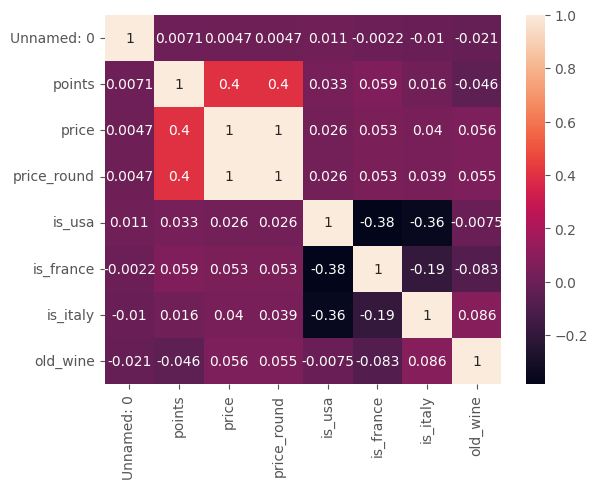

In [319]:
import seaborn as sns # импортируем seaborn для построения графиков
sns.heatmap(data.corr(), annot=True) # включаем отображение коэффициентов sns.heatmap(data11.corr(), annot = True)

In [10]:
heart = pd.read_csv('C:\Temp\Pythone/heart.csv')
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [11]:
heart['old'] = heart['age'].apply(lambda x: 1 if x >60 else 0)
heart['old'].sum()

79

In [12]:
def get_trestbps_mean(row):
    if row['sex']==1:
        if row['age']<20:
            return 123
        elif 21<=row['age']<=30:
            return 126
        elif 31<=row['age']<=40:
            return 129
        elif 41<=row['age']<=50:
            return 135
        elif row['age']<=61:
            return 142
        elif row['age']>=61:
            return 142
    if not row['sex']:
        if row['age']<20:
            return 116
        elif 21<=row['age']<=30:
            return 120
        elif 31<=row['age']<=40:
            return 127
        elif 41<=row['age']<=50:
            return 137
        elif row['age']>=61:
            return 159
          
heart['trestbps_mean'] = heart[['age', 'sex']].apply(get_trestbps_mean, axis=1)
heart.head(1)
#heart.loc[300,'trestbps_mean']
##df.iloc[df['column_name'] == some_value]   .loc[row, col] 
#heart.info()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142.0


In [13]:
import category_encoders as ce
encoder1 = ce.OneHotEncoder(cols=['cp'])
heart1 = encoder1.fit_transform(heart['cp'])
#heart_n = pd.concat([heart, heart1], axis=1)
encoder2 = ce.OneHotEncoder(cols=['restecg'])
heart2 = encoder2.fit_transform(heart['restecg'])
#heart_n = pd.concat([heart_n, heart2], axis=1)
encoder3 = ce.OneHotEncoder(cols=['slope'])
heart3 = encoder3.fit_transform(heart['slope'])
#heart_n = pd.concat([heart_n, heart3], axis=1)
encoder4 = ce.OneHotEncoder(cols=['ca'])
heart4 = encoder4.fit_transform(heart['ca'])
#heart_n = pd.concat([heart_n, heart4], axis=1)
encoder5 = ce.OneHotEncoder(cols=['thal'])
heart5 = encoder5.fit_transform(heart['thal'])
heart_1 = pd.concat([heart,heart1,heart2,heart3, heart4, heart5], axis=1)
#heart_1
#heart_1.info()

In [14]:
from sklearn import preprocessing #нормализация
r_scaler = preprocessing.RobustScaler()
dr = r_scaler.fit_transform(heart[['chol']].values.reshape(-1, 1))
pd.DataFrame(dr)

#Да, при моей подсказке код из задания (dr['price'].sum()) выдаст ошибку из-за отсутствия столбца 'price'. 
#С ней нетрудно справиться, дав название столбцу (columns = ['foo', 'bar', 'baz']).



,0
0,-0.110236
1,0.157480
2,-0.566929
3,-0.062992
4,1.795276
...,...
298,0.015748
299,0.377953
300,-0.740157
301,-1.716535


In [15]:
#Задание 8.6 Нормализуйте все числовые признаки подходящим способом. 
# В ответе напишите стандартное отклонение признака chol. Ответ округлите до шести знаков после запятой

r_scaler = preprocessing.RobustScaler()
# кодируем исходный датасет
heart_2 = r_scaler.fit_transform(heart_1)
columns_num = list(list(heart_1.dtypes[(heart_1.dtypes == 'int64') | (heart_1.dtypes == 'float64')].index))
# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
heart_2 = pd.DataFrame(heart_2, columns=columns_num)
heart_2
#fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
#ax1.set_title('Распределения после RobustScaler')
#sns.kdeplot(df_r['beta'], ax=ax1)
#sns.kdeplot(df_r['exponential'], ax=ax1)
#sns.kdeplot(df_r['normal_p'], ax=ax1)
#sns.kdeplot(df_r['normal_l'], ax=ax1)
heart_2.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,-0.046938,-0.316832,-0.016502,0.081188,0.098646,0.148515,-0.471947,-0.103173,0.326733,0.149752,...,0.462046,-0.422442,0.125413,0.214521,0.066007,0.016502,0.059406,-0.452145,0.386139,0.006601
std,0.672748,0.466011,0.516026,0.876907,0.816232,0.356198,0.525860,0.704774,0.469794,0.725672,...,0.499382,0.494765,0.331734,0.411169,0.248704,0.127605,0.236774,0.498528,0.487668,0.081110
min,-1.925926,-1.000000,-0.500000,-1.800000,-1.795276,0.000000,-1.000000,-2.523077,0.000000,-0.500000,...,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,-0.555556,-1.000000,-0.500000,-0.500000,-0.456693,0.000000,-1.000000,-0.600000,0.000000,-0.500000,...,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.444444,0.000000,0.500000,0.500000,0.543307,0.000000,0.000000,0.400000,1.000000,0.500000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.629630,0.000000,1.000000,3.500000,5.102362,1.000000,1.000000,1.507692,1.000000,3.375000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000


In [16]:
heart_2.corr() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,...,0.177201,-0.350844,0.226491,0.179284,0.162243,-0.122378,0.063758,-0.135891,0.110752,-0.016779
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,...,-0.009157,-0.122854,-0.020571,0.096673,0.066758,0.088212,0.141135,-0.376365,0.321559,-0.032093
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,...,-0.156633,0.193087,-0.171632,-0.045686,-0.107590,0.054436,-0.073254,0.266947,-0.237760,0.002611
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,...,0.025207,-0.055011,0.088386,-0.059485,0.080109,0.019059,0.076369,-0.140712,0.109573,-0.016870
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,...,0.051177,-0.080600,0.059887,0.018775,0.098568,-0.095785,-0.093560,-0.004591,0.059621,-0.057127
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,...,-0.033360,-0.112548,0.122080,-0.014774,0.075867,0.018754,0.091351,-0.086774,0.030953,0.080568
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,...,-0.087349,0.096607,-0.058198,-0.050897,-0.064842,0.067098,-0.013429,0.029597,-0.023012,-0.004356
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,...,-0.419627,0.273136,-0.056905,-0.195502,-0.175506,0.060911,-0.159748,0.294801,-0.215417,-0.050429
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,...,0.257687,-0.187734,0.097399,0.150206,0.013188,-0.035001,0.063073,-0.328539,0.300223,0.030113
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,...,0.310986,-0.204803,0.218319,-0.011613,0.189296,-0.104998,0.104635,-0.339086,0.302145,-0.037946


In [187]:
import pandas as pd 

# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]
calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])
# преобразовываем признаки в формат datetime для удобной работы
calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])
calls
#Все признаки в наборе данных, за исключением номера клиента, представляют собой дату и время. 
# Давайте создадим несколько признаков из этих данных.
#Мы можем посчитать, сколько примерно длилось время разговора клиента и сотрудника компании — длительность разговора. 
#Подсчитаем разницу между датой и временем начала разговора с клиентом и датой и временем окончания звонка.
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls
#Подсчитайте, сколько секунд тратят сотрудники компании на дозвон клиенту. Результат запишите в новый признак time_connection.
#В ответ запишите результат выполнения следующего кода: calls['time_connection'].sum().
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds

#calls['time_connection'].sum()

In [188]:
#Создайте новый признак is_connection — факт соединения с клиентом. 
# Признак будет равен 1 в случае, если разговор состоялся и продлился больше 10 секунд, иначе — 0.
#В ответ запишите результат выполнения следующего кода: calls['is_connection'].sum().
calls['is_connection'] = (calls['duration'].apply(lambda x: 1 if x > 10 else 0))
calls['is_connection'].sum()


7

In [ ]:
# Построим график корреляции всех величин. Для простоты воспользуемся корреляцией Пирсона.
# работа с визуализацией
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)

# Удалим самые сильно скоррелированные пары
#data = data.drop(['is_usa', 'is_france', 'is_italy', 'price_round', 'area'], axis=1)
# Проверяем, что сильно скоррелированных признаков не осталось
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)

In [6]:
#statistics.mean(data['price'])
#statistics.median(data['price'])
#data['price'].median()
#statistics.mode(data['price'])
#data['price'].mode()

In [15]:
data.corr()

C:\Users\e.korenkova\AppData\Local\Temp\ipykernel_18032\2627137660.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Unnamed: 0,points,price
Unnamed: 0,1.000000,0.007124,0.004652
points,0.007124,1.000000,0.402137
price,0.004652,0.402137,1.000000


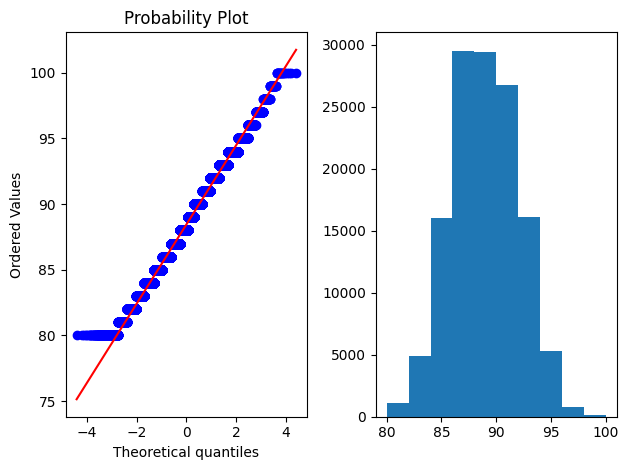

In [21]:
plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(data['points'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(data['points']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

In [261]:
data.corr('spearman')

C:\Users\e.korenkova\AppData\Local\Temp\ipykernel_17456\2498334852.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Unnamed: 0,points,price,price_round,is_usa,is_france,is_italy,old_wine
Unnamed: 0,1.000000,0.009378,0.003751,0.003718,0.010936,-0.002183,-0.010174,-0.020749
points,0.009378,1.000000,0.581095,0.581810,0.038398,0.051048,0.008689,-0.048738
price,0.003751,0.581095,1.000000,0.999701,0.149580,0.024840,0.074677,0.068281
price_round,0.003718,0.581810,0.999701,1.000000,0.153626,0.021537,0.073025,0.067831
is_usa,0.010936,0.038398,0.149580,0.153626,1.000000,-0.384589,-0.357481,-0.007523
is_france,-0.002183,0.051048,0.024840,0.021537,-0.384589,1.000000,-0.190361,-0.082898
is_italy,-0.010174,0.008689,0.074677,0.073025,-0.357481,-0.190361,1.000000,0.085635
old_wine,-0.020749,-0.048738,0.068281,0.067831,-0.007523,-0.082898,0.085635,1.000000


In [23]:
data.corr('kendall')

C:\Users\e.korenkova\AppData\Local\Temp\ipykernel_18032\2212504576.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Unnamed: 0,points,price
Unnamed: 0,1.000000,0.006536,0.002533
points,0.006536,1.000000,0.433498
price,0.002533,0.433498,1.000000


In [26]:
x = [+1, -1, +1, +1] # список значений признака х
y = [+1, +1, +1, -1] # список значений признака y

matthews_corrcoef(x, y) # рассчитаем коэффициент корреляции Мэтьюса

-0.3333333333333333

In [27]:
data11 = pd.read_csv('C:\Temp\Pythone/model.csv')
data11.head(1)


,Month,Year,Waist,Hips,Height,Weight,BMI,Waist/Hip
0,December,1953,24.0,36.0,65.0,118.0,19.63,0.67


In [28]:
data11.corr()

C:\Users\e.korenkova\AppData\Local\Temp\ipykernel_18032\1248400905.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Year,Waist,Hips,Height,Weight,BMI,Waist/Hip
Year,1.000000,0.292518,-0.281576,0.284482,-0.010753,0.025309,0.458945
Waist,0.292518,1.000000,0.283060,0.372637,0.452704,0.136549,0.742284
Hips,-0.281576,0.283060,1.000000,0.228054,0.541836,0.211395,-0.422412
Height,0.284482,0.372637,0.228054,1.000000,0.706569,-0.037934,0.198754
Weight,-0.010753,0.452704,0.541836,0.706569,1.000000,0.212701,0.067543
BMI,0.025309,0.136549,0.211395,-0.037934,0.212701,1.000000,-0.010173
Waist/Hip,0.458945,0.742284,-0.422412,0.198754,0.067543,-0.010173,1.000000


C:\Users\e.korenkova\AppData\Local\Temp\ipykernel_18032\4089836875.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

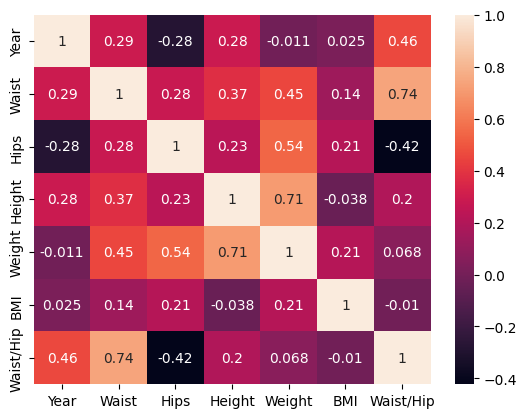

In [30]:
sns.heatmap(data11.corr(), annot = True)